In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from scipy import stats

import csv
from scipy.optimize import curve_fit
import pandas as pd
import pylab as pl
import matplotlib.patches as patches
from matplotlib.path import Path
import matplotlib as mpl
import matplotlib.ticker
# These defaults are the ones I like, but feel free to adapt or delete them
sns.set_style('white')
sns.set_context('talk')

# Electron Density PWN

In [2]:
## Define here all constants to use throughout the notebook:

M_sun = 1.989E33     #Solar mass in grams
m_p = 1.672E-24      #proton mass in gram
m_e = 9.10938e-28    #electron mass in grams
mu_e = 1.3           #mean molecular weight

pc = 3.08567758E18   #parsec in cm

E_0 = 1.229904e+51   #Typical Supernova explosion energy in ergs #1.229904e+44 #in Watt

e = 4.80320427e-10   #electron charge in Statcoulombs. #==1.60217662e-19 in Coulomb

In [3]:
def rad_pwn(t,M_pwn):
    return (1.87)*((E_0/10.**51.)**0.246)*((M_pwn/M_sun)**(-0.5))*((t/10.**3.)**1.254)

In [4]:
def ed_pwn(r,M_pwn):
    return ((3.*M_pwn)/(4.*np.pi*((r*pc)**3.)*mu_e*m_p)) #r defined in cm, therefore multiply by pc (in cm)

In [5]:
t_up = 1000  #in yrs
M_pwn = 0.1*M_sun
t_e_pwn = np.arange(0,t_up,10.)
r_t_pwn = rad_pwn(t_e_pwn,M_pwn)
n_e_pwn = ed_pwn(r_t_pwn,M_pwn) 


/Users/samayrastraal/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


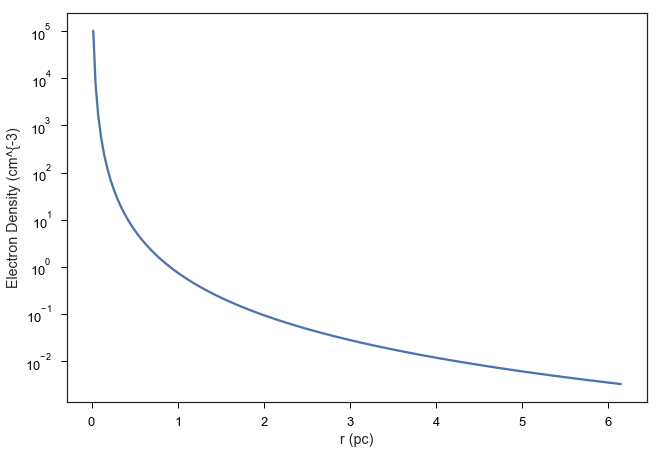

In [6]:
#Plot against radius
fig, ax = plt.subplots()
ax.plot(r_t_pwn,n_e_pwn)
ax.set_yscale("log") #plot in logscale
ax.set_xlabel("r (pc)")
ax.set_ylabel(r"Electron Density (cm^{-3)")
ax.tick_params(direction='out', length=6, width=1, colors='black')

plt.show()

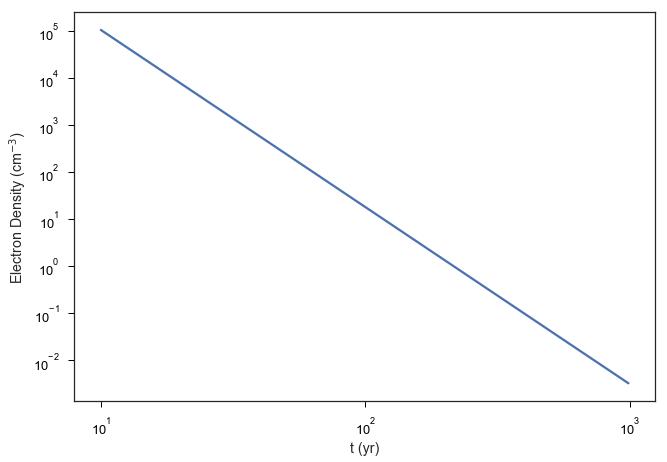

In [7]:
#Plot against time
fig, ax = plt.subplots()
ax.plot(t_e_pwn,n_e_pwn) 
ax.set_yscale("log") #plot in logscale
ax.set_xscale("log")
ax.set_xlabel("t (yr)")
ax.set_ylabel(r"Electron Density (cm$^{-3}$)")
ax.tick_params(direction='out', length=6, width=1, colors='black')

plt.show()

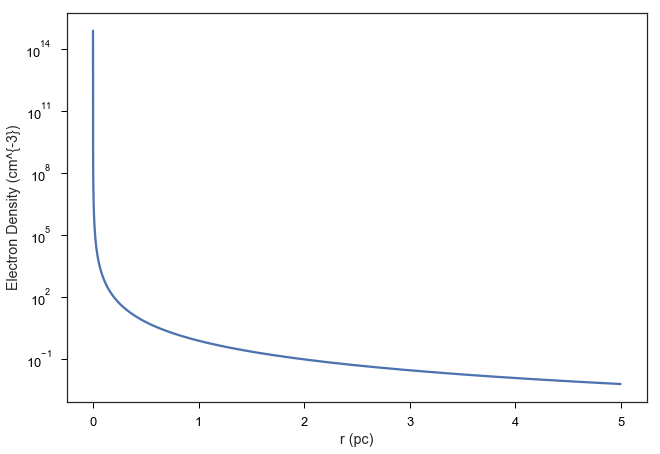

In [8]:
#Plot up to radius = 5 pc
r_up = 5 #upper radius
r = np.arange(0.00001,r_up,0.001) #Create list of radii to calculate outcomes of formula. Also to use in plot
ne_pwn = ed_pwn(r,M_pwn) #Electron density in the PWN 
fig, ax = plt.subplots()

ax.plot(r,ne_pwn)
ax.set_yscale("log") #plot in logscale
ax.set_xlabel("r (pc)")
ax.set_ylabel(r"Electron Density (cm^{-3})")
ax.tick_params(direction='out', length=6, width=1, colors='black')

plt.show()

## Define scattering time

In [9]:
def T_s(e_p, r_t_pwn):
    a = d = r_t_pwn
    delta_n_e = (e_p) - 0.03
    f = 1.4e+9 #in Hz
    return ((e**4./(4.*(np.pi**2.)*(m_e**2.)))*((delta_n_e**2.)/a)*(d**2.)*(f**(-4.)))


/Users/samayrastraal/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in multiply


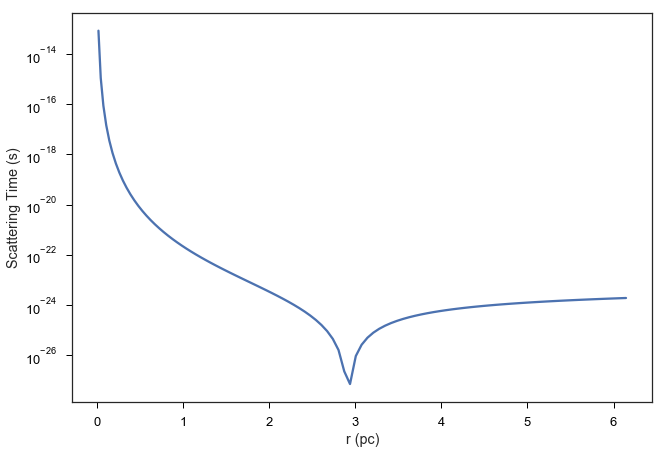

In [10]:
T_s_tot_pwn = T_s(n_e_pwn, r_t_pwn)

fig, ax = plt.subplots()
ax.plot(r_t_pwn,T_s_tot_pwn) 

ax.set_yscale("log") #plot in logscale
ax.set_xlabel("r (pc)")
ax.tick_params(direction='out', length=6, width=1, colors='black')
ax.set_ylabel("Scattering Time (s)")
plt.show()

# Electron Density homogeneous SNR

In [11]:
def rad(t):
    return ((12.9)*((t/10000.)**(2./5.)))   

In [12]:
def e_d(r,M_ej):
    return ((3.*M_ej)/(4.*np.pi*((r*pc)**3.)*mu_e*m_p)) #r defined in cm, therefore multiply by pc (in cm)

/Users/samayrastraal/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


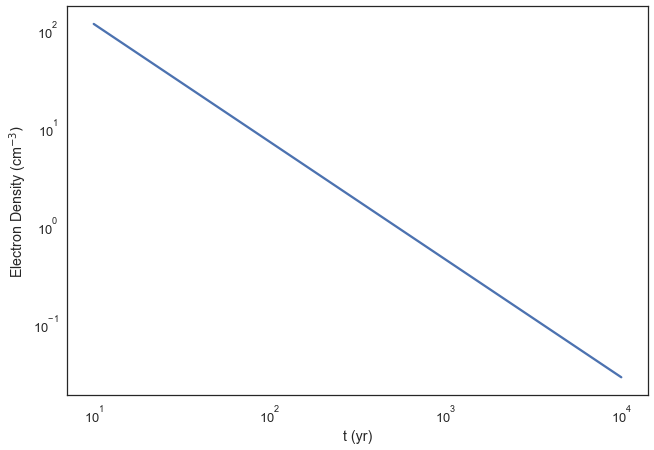

In [14]:
t_up = 1e+4  #in yrs
t_e = np.arange(0,t_up,10)
r_t = rad(t_e)
M_ej_SNR = 8.*M_sun
n_e = e_d(r_t,M_ej_SNR) 

fig, ax = plt.subplots()
ax.plot(t_e,n_e) 

ax.set_yscale("log") #plot in logscale
ax.set_xscale("log")
ax.set_xlabel("t (yr)")
ax.set_ylabel(r"Electron Density (cm$^{-3})$")
plt.show()


/Users/samayrastraal/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


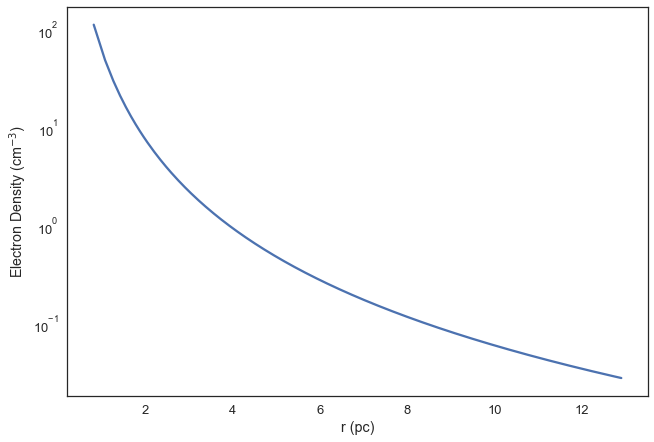

In [15]:
n_e_SNR = e_d(r_t,M_ej_SNR)
fig, ax = plt.subplots()
ax.plot(r_t,n_e_SNR)

ax.set_yscale("log") #plot in logscale
ax.set_xlabel("r (pc)")
ax.set_ylabel(r"Electron Density (cm$^{-3}$)")
plt.show()

In [16]:
#Here we plot the electron density of the SNR shell against the expanding radius of the outer edge of the shell

def V_sph_out(r_o): # Volume of outer sphere
    return (4./3.)*(np.pi*((pc*r_o)**3.))

def V_sph_inn(r_o,d_shell): # Volume of inner sphere
    return (4./3.)*(np.pi*((pc*(r_o-d_shell))**3.))

def V_sh(r_o,d_shell): # Volume of shell -- difference between previous two functions
    return V_sph_out(r_o) - V_sph_inn(r_o,d_shell)

def N_e(M_ej): # electron density of the SNR
    f_i = 1
    return f_i*(M_ej/(mu_e*m_p))

def e_d_sh(r_o,M,d_shell): # Electron density of the shell
    V_shell = V_sh(r_o,d_shell)
    return (N_e(M))/V_shell


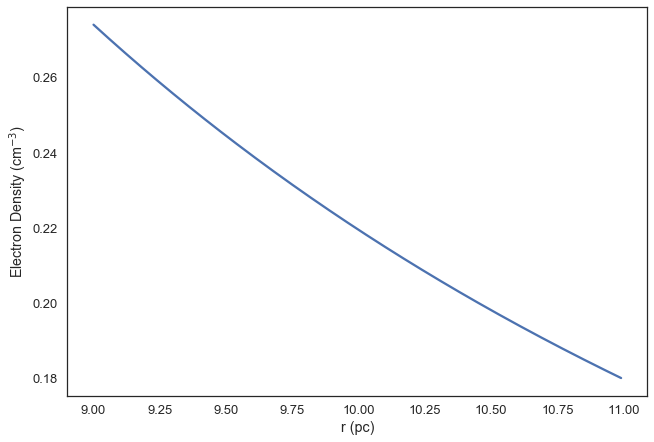

In [17]:
r_o_up = 11. #Upper limit of the SNR radius
r_o_e = np.arange(9.,r_o_up,0.01)

d_shell = 1. #pc
M_ej_shell = 8.*M_sun
e_d_tot = e_d_sh(r_o_e,M_ej_shell,d_shell)

fig, ax = plt.subplots()
ax.plot(r_o_e,e_d_tot) 

ax.set_xlabel("r (pc)")
ax.set_ylabel(r"Electron Density (cm$^{-3}$)")
plt.show()

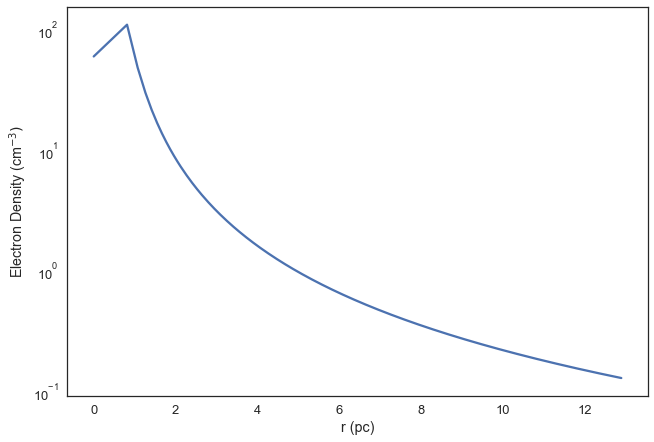

In [18]:
e_d_tot_r = e_d_sh(r_t,M_ej_shell,d_shell)
fig, ax = plt.subplots()
ax.plot(r_t, e_d_tot_r) 
ax.set_yscale("log")
ax.set_xlabel("r (pc)")
ax.set_ylabel(r"Electron Density (cm$^{-3})$")
plt.show()

In [19]:
def T_s(e_d_tot,d_shell,r_up, freq):
    a = d_shell*pc
    delta_n_e = e_d_tot - 0.03
    d = r_up*pc
    f = freq*10**6. #in Hz
    return ((e**4./(4.*(np.pi**2.)*(m_e**2.)))*((delta_n_e**2.)/a)*(d**2.)*(f**(-4.)))

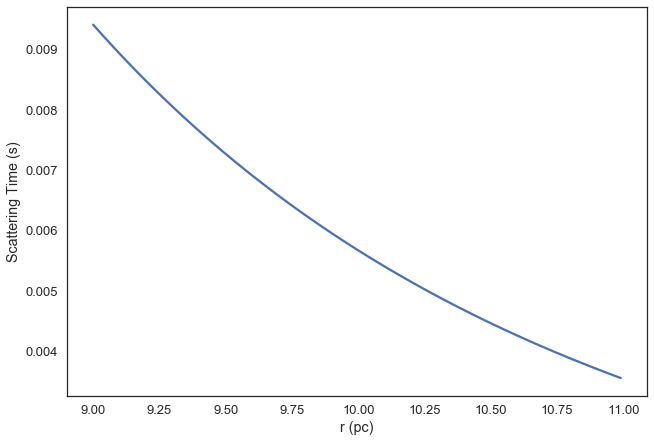

In [20]:
T_s_tot = T_s(e_d_tot,d_shell,r_o_up, 1400.)
fig, ax = plt.subplots()
ax.plot(r_o_e,T_s_tot) 
ax.set_xlabel("r (pc)")
ax.set_ylabel("Scattering Time (s)")
plt.show()

In [21]:
def e_t(t, M): ##I Don't know what you mean here
    M_ej = M*M_sun
    e_0 = 0.75e+51
    n_0 = 0.03 #electrons cm^-3
    # r = 12.9*((t/10**4)**(2/5))*((e_0/n_0)**(1/5))
    return ((3.*M_ej)/(4.*np.pi*((pc*(12.9*((t/10**4)**(2/5))*((e_0/n_0)**(1/5))))**3.)*mu*m)) #r defined in cm, therefore multiply by pc (in cm)

# Determine scattering time for SNR G21.5-0.9 which hosts PSR J1833-1034

In [22]:
M_ej_G21 = 10.*M_sun*0.25 #ionisation fraxtion = 25%
R_PWN_G21 = 1. #in pc
R_SNR_G21 = 3.6 #in pc
d_sh_G21 = 1.8 #~50%(pc) because there is not really a shell formed
n_e_shell_G21 = e_d_sh(R_SNR_G21, M_ej_G21, d_sh_G21)
print "density of the shell of SNR G21.5-0.9 is ", n_e_shell_G21, " pc cm^-3$"
t_scatter = T_s(n_e_shell_G21, d_sh_G21, R_SNR_G21, 1400.)
print "Expected scatter time at 1.4 GHZ is ", t_scatter*1000., " milliseconds"

density of the shell of SNR G21.5-0.9 is  0.455343736213  pc cm^-3$
Expected scatter time at 1.4 GHZ is  1.69995659812  milliseconds


## Find M_ej, R_SNR and R_PWN here: http://iopscience.iop.org/article/10.1086/498386/pdf
## Find Age here: https://arxiv.org/pdf/1008.1794.pdf

Scatter time for PSR J1833-1034 at 1.4GHz is less than 0.8 ms. So maybe the density is not as high as expected.
Image to this remnant: https://www.google.nl/url?sa=i&rct=j&q=&esrc=s&source=images&cd=&cad=rja&uact=8&ved=0ahUKEwia07fT4ofZAhWmJMAKHV70BIMQjRwIBw&url=https%3A%2F%2Fwww.mpi-hd.mpg.de%2Fhfm%2FHESS%2Fpages%2Fhome%2Fsom%2F2008%2F02%2F&psig=AOvVaw1-cxoj2bvjeOZ0__gfbQ_B&ust=1517679443630557
